<a href="https://colab.research.google.com/github/MohammadAliAfsahi/Machine-Learning-and-Deep-Learning/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying Iris Species

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [0]:
iris_dataset = load_iris()

print('\nKeys of iris_dataset: \n{}'.format(iris_dataset.keys()))

print('\nshort description: \n', iris_dataset['DESCR']+'\n')

print('\nTraget names in order to predict: \n{}'.format(iris_dataset.target_names))

print('\nfeatures: \n{}'.format(iris_dataset.feature_names))

print('\nType of data: \n{}'.format(type(iris_dataset['data'])))

print('\nShape of data: \n{}'.format(iris_dataset['data'].shape))

print('\ndata columns: \n{}'.format(iris_dataset['data'][:5]))

print('\nType of Target: \n{}'.format(type(iris_dataset['target'])))

print('\nShape of Target: \n{}'.format(iris_dataset.target.shape))

print('\nTarget: \n{}'.format(iris_dataset['target']))


df = pd.DataFrame(iris_dataset.data, columns=[iris_dataset.feature_names])

df['target_names'] = pd.Series(iris_dataset.target_names)

df['target'] = pd.Series(iris_dataset.target)

df['filename'] = pd.Series(iris_dataset.filename)

df.head()



Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

short description: 
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.

sepal length (cm)  ...                                           filename
0               5.1  ...  /usr/local/lib/python3.6/dist-packages/sklearn...
1               4.9  ...                                                NaN
2               4.7  ...                                                NaN
3               4.6  ...                                                NaN
4               5.0  ...                                                NaN

[5 rows x 7 columns]

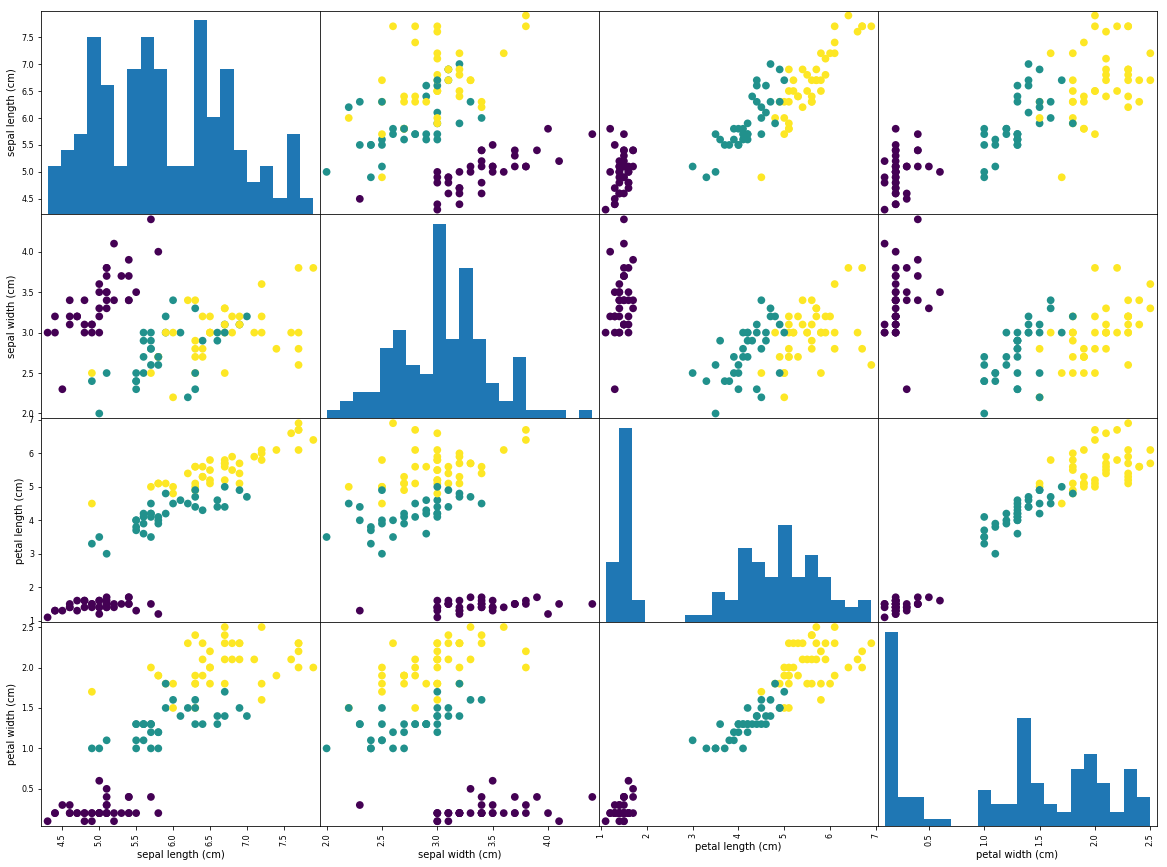

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

scatter_plot = scatter_matrix(iris_dataframe, c=y_train, figsize=(20,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=1)

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

predictions = knn.predict(X_test)

print('predictions: \n{}'.format(predictions))

print('\naccuracy: \n{}'.format(np.mean(predictions==y_test)))

print('\naccuracy: \n{}'.format(knn.score(X_test, y_test)))


predictions: 
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]

accuracy: 
0.9736842105263158

accuracy: 
0.9736842105263158


# Linear Model using Scikit Learn - Life Satisfaction vs GDP per capita

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [0]:
url_oecd = 'https://raw.githubusercontent.com/ClaudiuCreanga/hands-on-machine-learning-scikit-learn-tensorflow-oreilly-geron/master/datasets/lifesat/oecd_bli_2015.csv'

url_gdp = 'https://raw.githubusercontent.com/ClaudiuCreanga/hands-on-machine-learning-scikit-learn-tensorflow-oreilly-geron/master/datasets/lifesat/gdp_per_capita.csv'

OECD_bli = pd.read_csv(url_oecd, thousands=',')

GDP_per_capita = pd.read_csv(url_gdp, thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

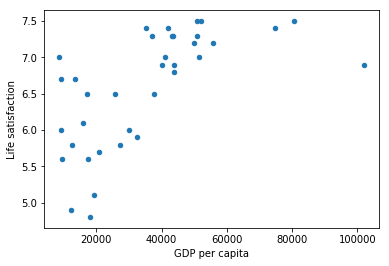

In [0]:
life_sat_total = OECD_bli[OECD_bli["INEQUALITY"]=="TOT"]

life_sat_total = life_sat_total.pivot(index="Country", columns="Indicator", values="Value")

GDP_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

country_stats = life_sat_total.merge(GDP_per_capita, on='Country')

X = np.c_[country_stats['GDP per capita']]

y = np.c_[country_stats['Life satisfaction']]

country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')

plt.show()

In [0]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X, y)

prediction = linear_regression_model.predict([[22587]])

print('predictions: \n{}'.format(prediction))

predictions: 
[[6.28653637]]
